In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

import xrft
from glob import glob

In [2]:
ds = xr.Dataset(coords={'time': ('time', np.arange(3000)*3600.)})
ds = ds.assign(u=np.cos(2.*np.pi*2/86400.*ds.time)+np.random.randn(ds.time.size))
ds = ds.assign(v=np.sin(2.*np.pi*2/86400.*ds.time)+np.random.randn(ds.time.size))
print(ds)

<xarray.Dataset>
Dimensions:  (time: 3000)
Coordinates:
  * time     (time) float64 0.0 3.6e+03 7.2e+03 1.08e+04 1.44e+04 1.8e+04 ...
Data variables:
    u        (time) float64 1.706 1.588 0.9046 0.2375 -0.1428 0.01576 1.489 ...
    v        (time) float64 -0.5918 0.7798 -1.026 0.7901 1.264 1.195 -0.5356 ...


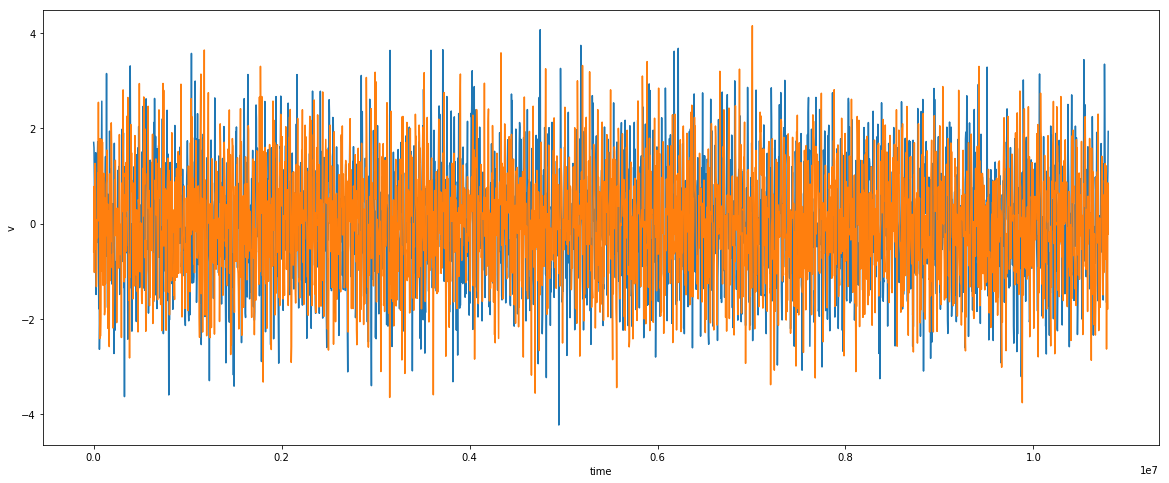

In [3]:
fig, ax = plt.subplots(figsize=(20,8))
ds['u'].plot()
ds['v'].plot()

In [4]:
%time uv_complex = (ds['u'] + 1j*ds['v'])
print(uv_complex)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 964 µs
<xarray.DataArray (time: 3000)>
array([1.705769-0.591822j, 1.587664+0.779767j, 0.904594-1.02589j , ...,
       0.768705-1.800415j, 1.09281 +0.855016j, 1.93639 -0.218578j])
Coordinates:
  * time     (time) float64 0.0 3.6e+03 7.2e+03 1.08e+04 1.44e+04 1.8e+04 ...


In [5]:
uv_fft = xrft.dft(uv_complex.fillna(0.), shift=False, detrend='linear')
E_uv = (uv_fft*uv_fft.conj()).where(uv_fft!=0., drop=False)
print(E_uv)
E_uv = E_uv.astype('f8').rename('uv_power_spectrum ()')

<xarray.DataArray (freq_time: 3000)>
array([6.478126e-27+0.j, 4.368497e+03+0.j, 1.006801e+03+0.j, ...,
       1.465536e+03+0.j, 1.590630e+03+0.j, 3.860833e+03+0.j])
Coordinates:
  * freq_time          (freq_time) float64 0.0 9.259e-08 1.852e-07 2.778e-07 ...
    freq_time_spacing  float64 9.259e-08


/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/xarray/core/ops.py:188: ComplexWarning: Casting complex values to real discards the imaginary part
  return method(*args, **kwargs)


(10.0, 1000000.0)

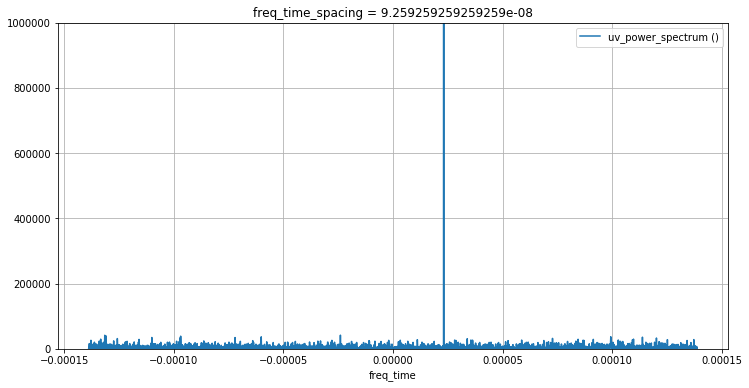

In [6]:
fig, ax = plt.subplots(figsize=(12,6))

E_uv.plot(ax=ax)
ax.legend(); ax.grid()
#ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylabel(''); 
#ax.set_yscale('log')
#ax.set_xlim([1.75*1e-3,1.75*1e-0])
ax.set_ylim([1e1,1e6])
